In [54]:
!pip install --upgrade pip

In [55]:
!pip install tensorflow opencv-python matplotlib

In [56]:
import tensorflow as tf
import os

# remove dodgy images
 remove images with wrong extensions

In [57]:
import cv2
import imghdr # to check the type of image


In [58]:
data_dir = 'data'

In [59]:
image_exts = ["jpeg","jpg","png","bmp"]

In [60]:
os.listdir(os.path.join(data_dir,"happy"))

['images26.jpg',
 'images32.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 '05-12-21-happy-people.jpg',
 'image22.jpeg',
 'GettyImages-871518740-1024x707.jpg',
 '7-principles-of-successful-and-happy-people.png',
 'how-happy-are-healthy-people.jpg',
 'physed-happiness-facebookJumbo.jpg',
 '170404-happy-workers-feature.jpg',
 'images33.jpg',
 'images27.jpg',
 'image18.jpeg',
 'MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg',
 'images31.jpg',
 'images25.jpg',
 'Happy-people-raise-happy-kids-raise-yourself-first.jpg',
 'images19.jpg',
 'habits-that-define-very-happy-people.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 '1902587.jpg',
 'o-HAPPY-facebook.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 'happy-people-13772392.jpg',
 'images18.jpg',
 'images24.jpg',
 'images30.jpg',
 'image14.jpeg',
 'image15.jpeg',
 'young-and-happy-people-vector-15114154.jpg',
 'images34.jpg',
 'maxresdefault2.jpg',
 'images20.jpg',
 'bigstock-Portrait-Of

In [61]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [62]:
import matplotlib.pyplot as plt

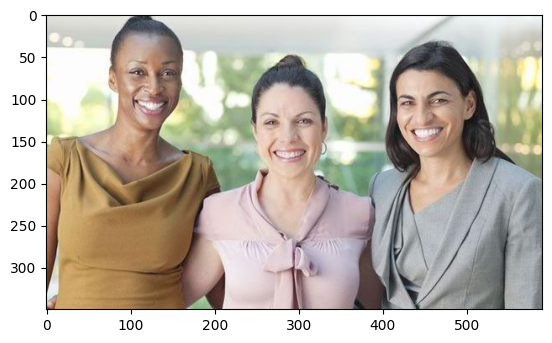

In [63]:
# read image in cv2 and show the image
img = cv2.imread(os.path.join('data', 'happy', '1-2.jpg'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

 create a dataset using keras pipeline which automatcially labels the classes in batches of 32 and also resizes them
 using image_dataset_from_directory

In [64]:
import numpy as np
import tensorflow as tf

In [65]:
# builds an image dataset from a directory
data = tf.keras.utils.image_dataset_from_directory('data', image_size = (224, 224), batch_size = 32)

Found 305 files belonging to 2 classes.


In [66]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next() # this gets a batch of 32 images randomly and everytime we run it we get a new batch
# convert the batch to numpy array

# Preprocssing

In [67]:
# we will scale images from 0-255 to 0-1 by dividing by 255
scaled = batch[0]/255.0

tf.data.dataset is used when we need to apply a lot of functions to our datasets preprocessing
https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map - like the map function etc

In [68]:
data = data.map(
    lambda x, y: (
        (tf.cast(x, tf.float32) /
         tf.maximum(tf.reduce_max(tf.cast(x, tf.float32), axis=(1,2,3), keepdims=True), 1e-6)),
        y
    ),
    num_parallel_calls=tf.data.AUTOTUNE
)

In [69]:
it = data.as_numpy_iterator()
scaled_batch, _ = next(it)
scaled_batch[0].max()   # should be ~1.0 unless the image is all zeros

1.0

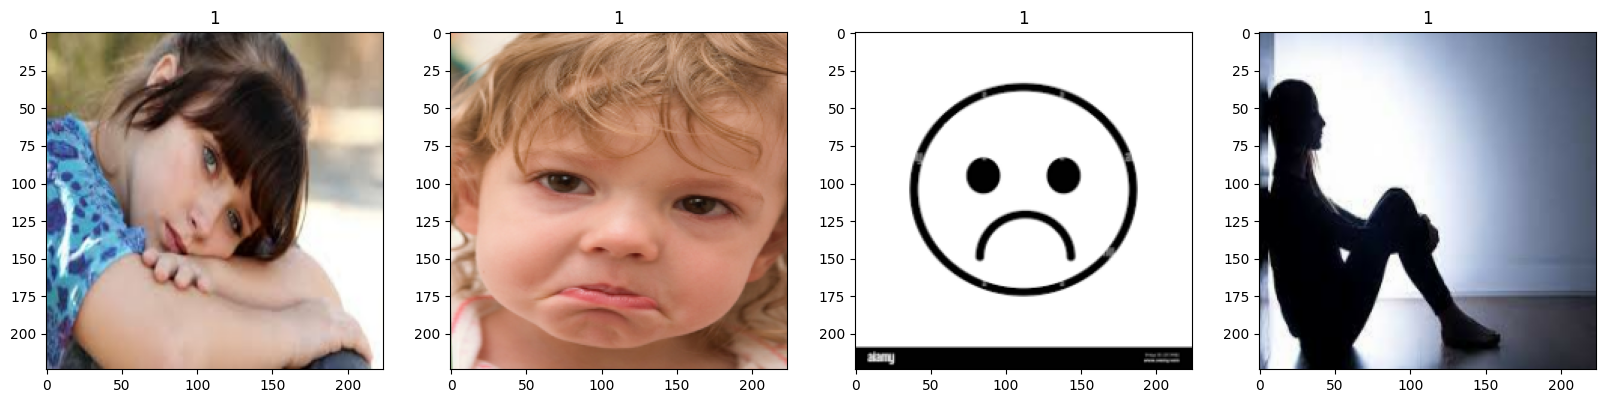

In [70]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [71]:

len(data)
#  we have 10 batches

10

In [72]:
num_batches = len(data)  # 10
train_size = int(num_batches * 0.7)      # 7
val_size   = int(num_batches * 0.2)      # 2
test_size  = num_batches - train_size - val_size  # 1


In [73]:

val_size+ test_size+ train_size

10

In [74]:
train = data.take(train_size)
val   = data.skip(train_size).take(val_size)
test  = data.skip(train_size + val_size).take(test_size)

# Deep model

#### Build the model

In [75]:
!pip3 install tensorflow.keras.models

ERROR: Could not find a version that satisfies the requirement tensorflow.keras.models (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.models


In [76]:
from tensorflow.keras.models import Sequential # 2 model model
# building API ---> 1 ip and o/p (quick and easy) --> functional
# and the other is functional # multiple input and output advanced (advanced)
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# convolution operation , maxpooling operation, Dense (fully connected layer), Flatten the last layer

In [77]:
# start by making a model
model = Sequential()

In [78]:
# 3 convolution blocks --> flatten ---> dense layer
# 16 filters and 3x3 kernel size and stride =1 and activation relu(only preserve positive value)--> introduce non linearity and input shaoe
model.add(Conv2D(16,(3,3),1, activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D()) # halves the input

model.add(Conv2D(32,(3,3),1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation="relu"))
model.add(MaxPooling2D())

# to make the multidimensional input one-dimensional, 
# commonly used in the transition from the convolution layer to the full connected layer
model.add(Flatten())

# fully connected layer
model.add(Dense(256,activation="relu")) 
model.add(Dense(1,activation="sigmoid")) # single output 0/1 


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model.compile("adam", loss = tf.losses.BinaryCrossentropy(), metrics=["accuracy"])
# optimizers 

In [80]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,769,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,779,121 (10.60 MB)

 Trainable params: 2,779,121 (10.60 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
log_dir = "logs"

In [82]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [83]:
hist = model.fit(train, epochs = 20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 753ms/step - accuracy: 0.5164 - loss: 1.1749 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 975ms/step - accuracy: 0.5568 - loss: 0.6765 - val_accuracy: 0.5469 - val_loss: 0.6447
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 812ms/step - accuracy: 0.5889 - loss: 0.6772 - val_accuracy: 0.5625 - val_loss: 0.6388
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6710 - loss: 0.5707 - val_accuracy: 0.8125 - val_loss: 0.4328
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 745ms/step - accuracy: 0.7932 - loss: 0.4643 - val_accuracy: 0.8438 - val_loss: 0.3752
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 674ms/step - accuracy: 0.8697 - loss: 0.4199 - val_accuracy: 0.9844 - val_loss: 0.3827
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 796ms/step - accuracy: 0.8508 - loss: 0.4036 - val_accuracy: 0.8594 - val_loss: 0.3406
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 611ms/step - accuracy: 0.8556 - loss: 0.3394 - val_accuracy: 0.9062 - val_loss: 0.

In [84]:
hist.history

{'accuracy': [0.5133928656578064,
  0.5848214030265808,
  0.6473214030265808,
  0.7276785969734192,
  0.7455357313156128,
  0.8392857313156128,
  0.8348214030265808,
  0.8616071343421936,
  0.9375,
  0.9196428656578064,
  0.9821428656578064,
  0.9598214030265808,
  0.9732142686843872,
  0.9910714030265808,
  0.9955357313156128,
  1.0,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128],
 'loss': [1.069749116897583,
  0.658774197101593,
  0.6483764052391052,
  0.5539628863334656,
  0.5280386805534363,
  0.43811914324760437,
  0.3976496160030365,
  0.3366047441959381,
  0.22309552133083344,
  0.20971165597438812,
  0.1328314244747162,
  0.12043798714876175,
  0.08265861123800278,
  0.052893299609422684,
  0.037676598876714706,
  0.014071336016058922,
  0.013287023641169071,
  0.03034561686217785,
  0.017733603715896606,
  0.011271190829575062],
 'val_accuracy': [0.5,
  0.546875,
  0.5625,
  0.8125,
  0.84375,
  0.984375,
  0.859375,
  0.90625,
  0.875,

In [85]:
import matplotlib.pyplot as plt

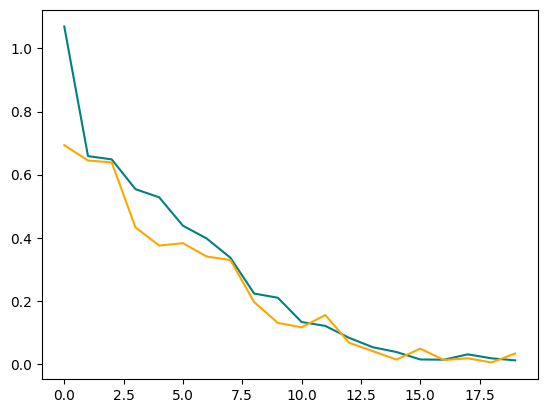

In [86]:

fig = plt.figure()
plt.plot(hist.history["loss"], color="teal", label ="loss")
plt.plot(hist.history["val_loss"], color="orange", label ="val_loss")
plt.show(
)


# Evaluating our model

In [87]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [88]:
pre = Precision()
recall = Recall()
acc = BinaryAccuracy()

In [89]:
len(test)

1

In [90]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat= model.predict(X)
    pre.update_state(y,yhat)
    recall.update_state(y,yhat)
    acc.update_state(y,yhat)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [91]:
pre.result().numpy()

1.0

In [92]:
recall.result().numpy()

1.0

In [93]:
acc.result().numpy()

1.0

In [94]:
import cv2

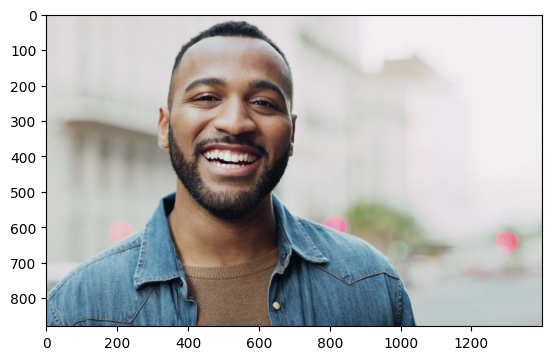

In [95]:
happy_img = cv2.imread("happy.jpg")
plt.imshow(cv2.cvtColor(happy_img,cv2.COLOR_BGR2RGB))

In [96]:
img = tf.image.resize(happy_img,(224,224))

In [97]:
np.expand_dims(img,0).shape

(1, 224, 224, 3)

In [98]:
yhat = model.predict(np.expand_dims(img/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [99]:
yhat

array([[0.1514964]], dtype=float32)

In [100]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# ssave the model

can be saved api or deployed at an edge device

In [101]:
from tensorflow.keras.models import load_model

In [102]:
model.save(os.path.join('models','imageclassifier.h5'))

In [105]:
new_model = load_model('models/imageclassifier.h5')

In [107]:
new_model.predict(np.expand_dims(img/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[0.1514964]], dtype=float32)